<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  15.8M      0  0:00:01  0:00:01 --:--:-- 15.8M


In [ ]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [ ]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [ ]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# Filtrar solo los vinos mexicanos

vinosMX = df[df['country'] == 'Mexico']

# Seleccionar las columnas requeridas
vinosMX = vinosMX[['country', 'winery', 'variety', 'description', 'points', 'price']]

# Reiniciar el índice
vinosMX.reset_index(drop=True, inplace=True)

# Guardar el DataFrame en la variable vinosMX
print(vinosMX.head())



  country       winery             variety  \
0  Mexico   L.A. Cetto            Nebbiolo   
1  Mexico  Monte Xanic     Sauvignon Blanc   
2  Mexico   L.A. Cetto  Cabernet Sauvignon   
3  Mexico  Cava Aragon            Nebbiolo   
4  Mexico   L.A. Cetto        Petite Sirah   

                                         description  points  price  
0  The color is appropriately light, the aromas a...      88   18.0  
1  Sauvignon Blanc is, in general, one of Baja's ...      87   15.0  
2  Aromas of mature Cabernet: cassis, tobacco lea...      87   18.0  
3  While this is fiery on the nose, you also get ...      88   27.0  
4  Dark and earthy, slightly pruny and alcoholic,...      83    8.0  


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

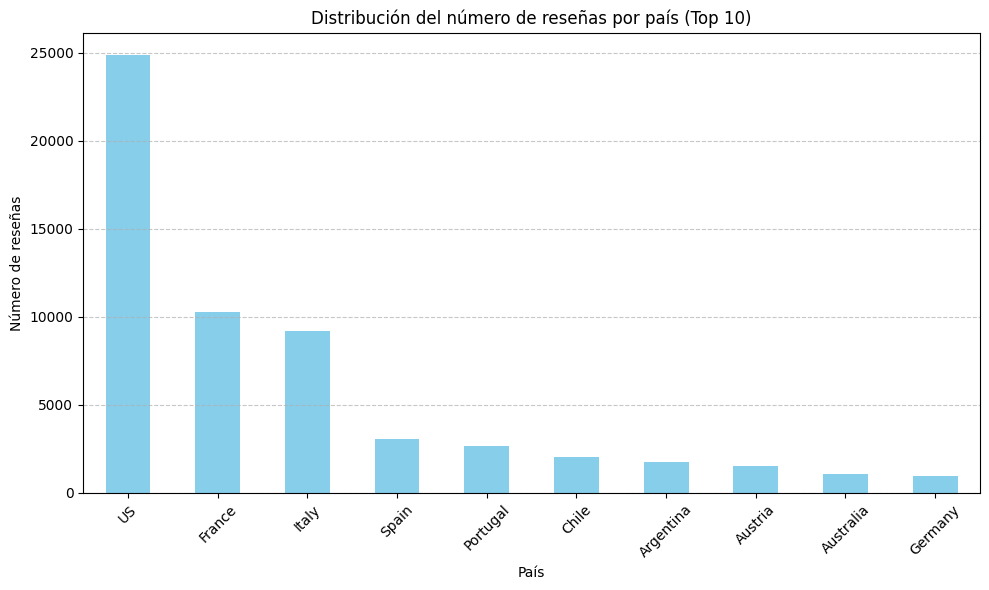

In [ ]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
import matplotlib.pyplot as plt

# Contar el número de reseñas por país
reseñas_por_pais = df['country'].value_counts().head(10)

# Graficar la distribución del número de reseñas por país
plt.figure(figsize=(10, 6))
reseñas_por_pais.plot(kind='bar', color='skyblue')
plt.title('Distribución del número de reseñas por país (Top 10)')
plt.xlabel('País')
plt.ylabel('Número de reseñas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

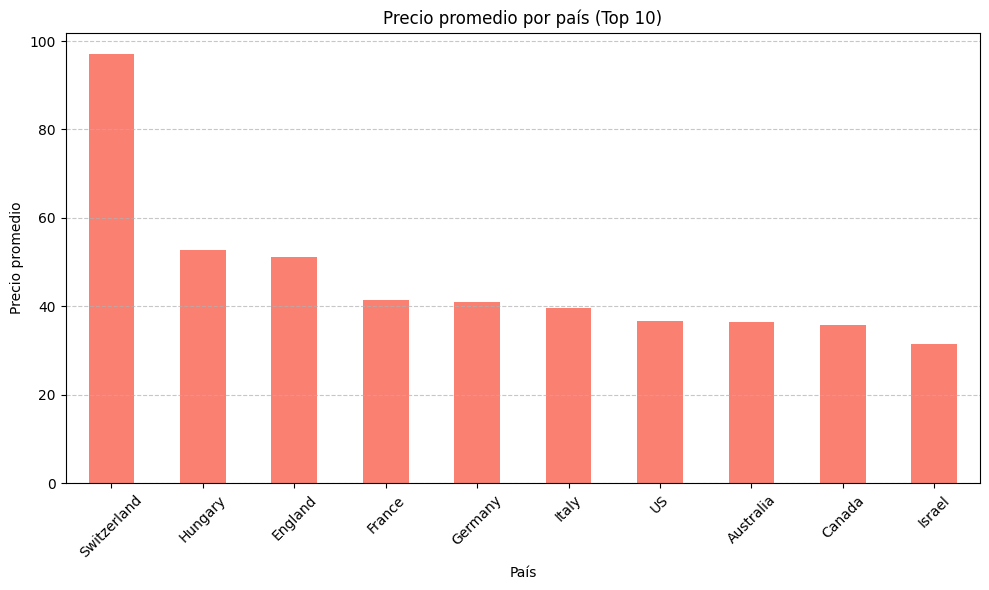

In [ ]:
"""
Calcular el precio promedio por país.
    Seleccionar los diez países principales con los precios promedio más altos.
    Graficar la distribución del precio promedio por país en una gráfica de barras

"""
# Calcular el precio promedio por país
precio_promedio_por_pais = df.groupby('country')['price'].mean().sort_values(ascending=False).head(10)

# Graficar la distribución del precio promedio por país
plt.figure(figsize=(10, 6))
precio_promedio_por_pais.plot(kind='bar', color='salmon')
plt.title('Precio promedio por país (Top 10)')
plt.xlabel('País')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

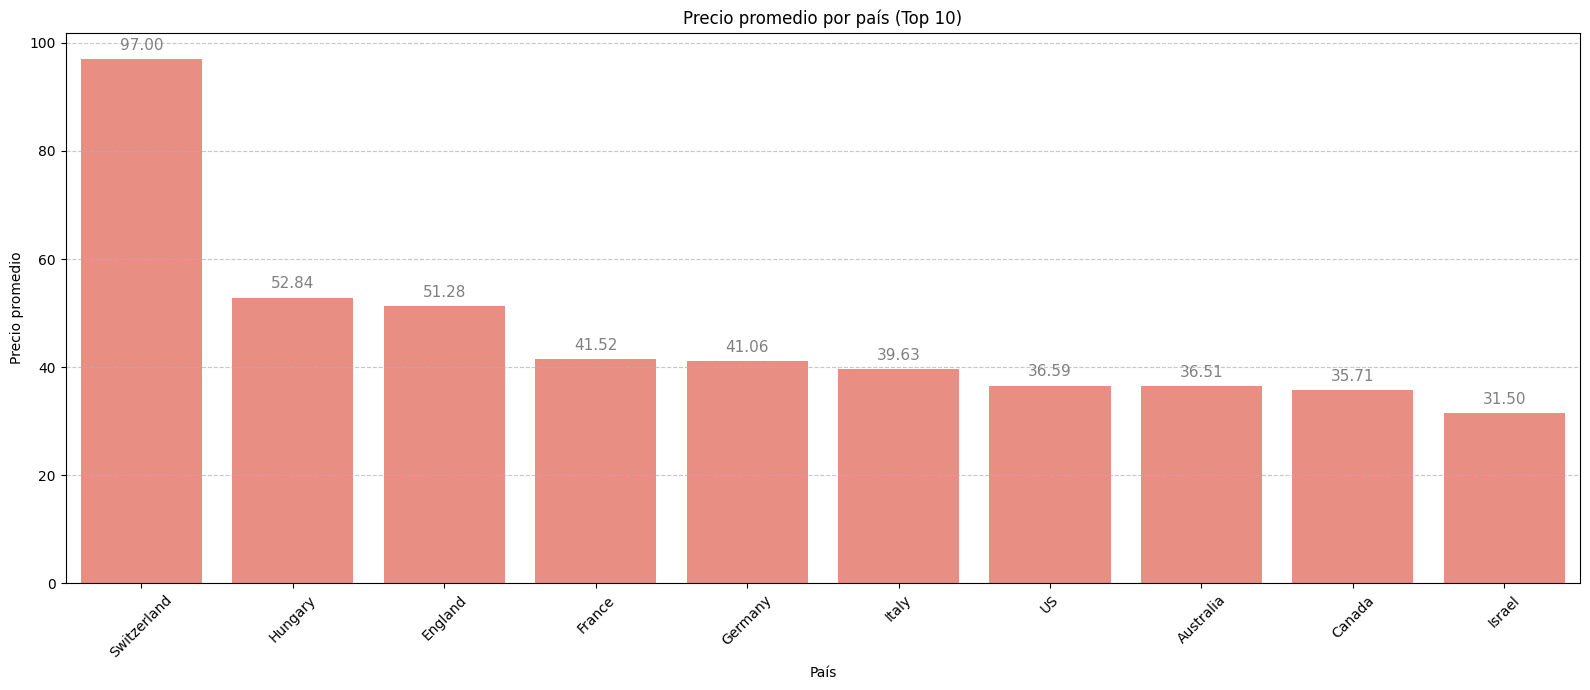

In [ ]:
precio_promedio_por_pais = df.groupby('country')['price'].mean().sort_values(ascending=False)

# Seleccionar los diez primeros países con precios promedio más altos
top_10_paises = precio_promedio_por_pais.head(10)

# Graficar la distribución del precio promedio por país
plt.figure(figsize=(16, 7))
ax = sns.barplot(x=top_10_paises.index, y=top_10_paises.values, color='salmon')
plt.title('Precio promedio por país (Top 10)')
plt.xlabel('País')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.tight_layout()
plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

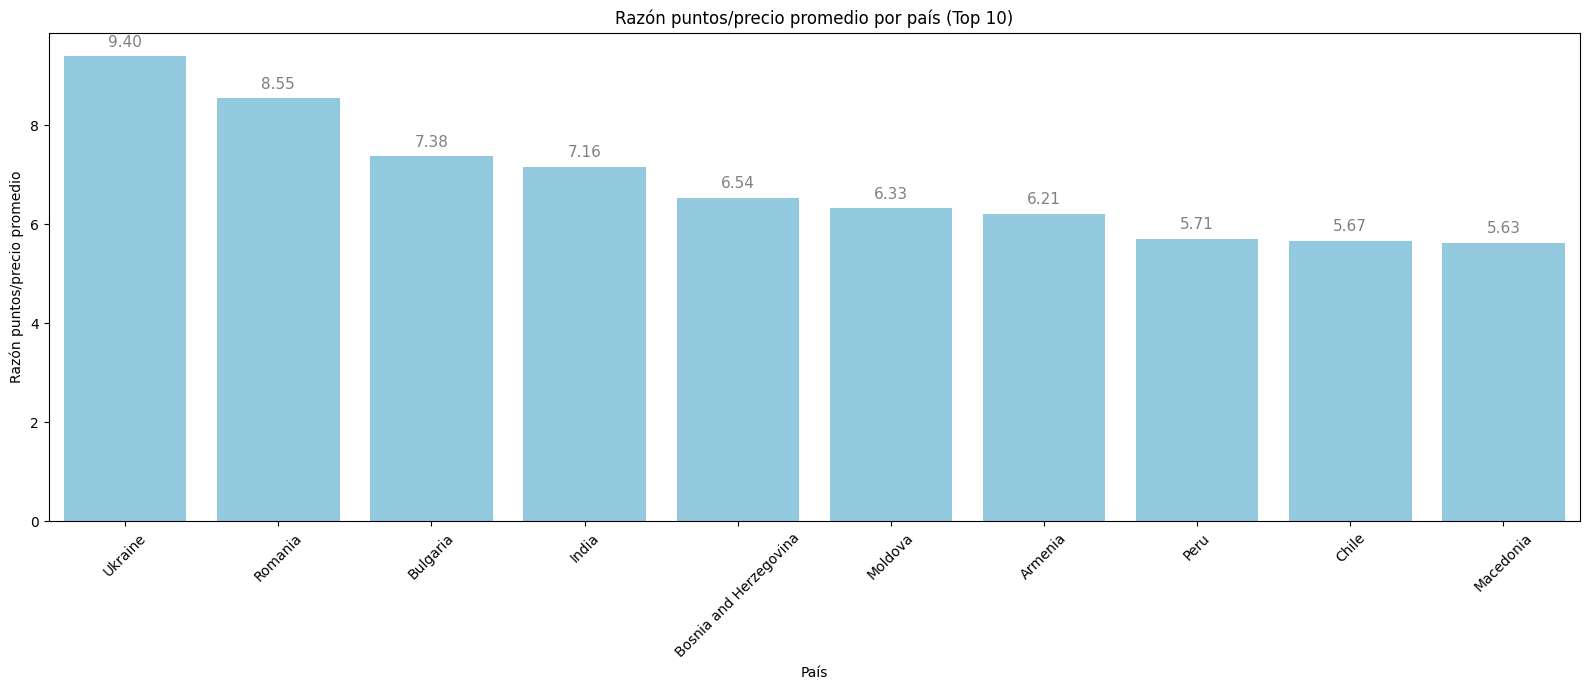

In [ ]:
"""
SECUENCIA:
    Calcular la razón entre los puntos y el precio promedio por país.
    Filtrar para eliminar valores infinitos o NaN en la razón puntos/precio promedio.
    Seleccionar los diez países principales con la mayor razón puntos/precio promedio.
    Graficar la distribución de la razón puntos/precio promedio por país en una gráfica de barras.

"""
# Calcular la razón entre puntos y precio promedio por país
df['puntos_sobre_precio'] = df['points'] / df['price']

# Filtrar para eliminar valores infinitos o NaN
df = df.replace([float('inf'), float('-inf')], float('nan')).dropna(subset=['puntos_sobre_precio'])

# Calcular la razón puntos/precio promedio por país
razon_puntos_precio_por_pais = df.groupby('country')['puntos_sobre_precio'].mean().sort_values(ascending=False)

# Seleccionar los diez primeros países con la mayor razón puntos/precio promedio
top_10_paises_razon = razon_puntos_precio_por_pais.head(10)

# Graficar la distribución de la razón puntos/precio promedio por país
plt.figure(figsize=(16, 7))
ax = sns.barplot(x=top_10_paises_razon.index, y=top_10_paises_razon.values, color='skyblue')
plt.title('Razón puntos/precio promedio por país (Top 10)')
plt.xlabel('País')
plt.ylabel('Razón puntos/precio promedio')
plt.xticks(rotation=45)

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.tight_layout()
plt.show()


### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

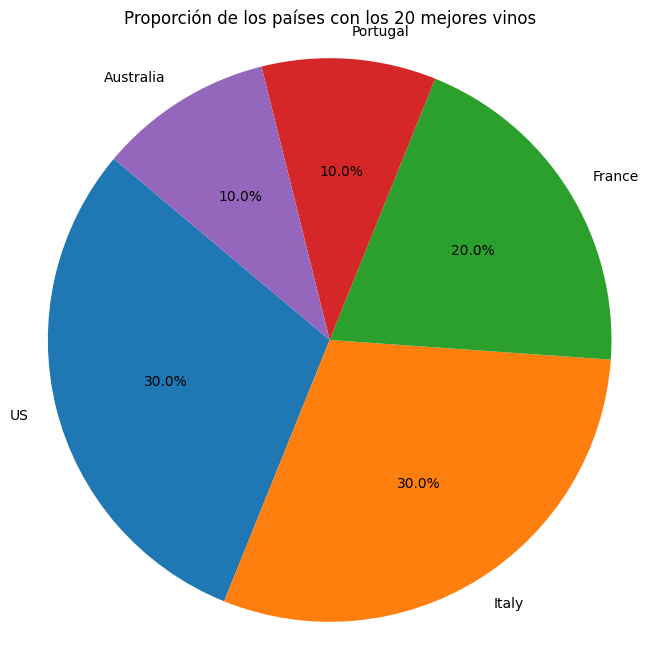

In [ ]:
# Ordenar el DataFrame por puntuación en orden descendente
df_sorted = df.sort_values(by='points', ascending=False)

# Seleccionar los primeros 20 registros
top_20_vinos = df_sorted.head(20)

# Contar cuántos vinos hay de cada país en los 20 registros
conteo_paises = top_20_vinos['country'].value_counts()

# Graficar la proporción de los países en un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_paises, labels=conteo_paises.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de los países con los 20 mejores vinos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
top_10_variedades = df['variety'].value_counts().head(10)
top_10_variedades_proporcion = top_10_variedades / len(df)


### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
top_20_bodegas = df['winery'].value_counts().head(20)
top_20_bodegas_proporcion = top_20_bodegas / len(df)



### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [ ]:
# Seleccionar las 10 variedades de uva más importantes
top_10_variedades = df['variety'].value_counts().head(10).index

# Seleccionar las 20 bodegas más importantes
top_20_bodegas = df['winery'].value_counts().head(20).index

# Filtrar el DataFrame original para incluir solo las 10 variedades de uva y las 20 bodegas más importantes
filtro = (df['variety'].isin(top_10_variedades)) & (df['winery'].isin(top_20_bodegas))
p_v = df[filtro]

# Seleccionar solo las columnas requeridas
p_v = p_v[['country', 'variety', 'winery', 'points', 'price']]

# Agregar una columna con el valor de puntos/precio
p_v['points_per_price'] = p_v['points'] / p_v['price']

# Cambiar el nombre de la bodega para que incluya su país de origen
p_v['winery'] = p_v['country'] + ' - ' + p_v['winery']

# Ordenar los datos por nombre de país, variedad y bodega (orden ascendente)
p_v = p_v.sort_values(by=['country', 'variety', 'winery'])

# Mostrar el DataFrame resultante
print(p_v)



         country             variety                winery  points  price  \
2141   Argentina  Cabernet Sauvignon  Argentina - Trapiche      84   10.0   
3056   Argentina  Cabernet Sauvignon  Argentina - Trapiche      88   15.0   
15948  Argentina  Cabernet Sauvignon  Argentina - Trapiche      90   15.0   
24370  Argentina  Cabernet Sauvignon  Argentina - Trapiche      88   10.0   
30928  Argentina  Cabernet Sauvignon  Argentina - Trapiche      91   30.0   
...          ...                 ...                   ...     ...    ...   
235           US               Syrah       US - Testarossa      85   49.0   
21415         US               Syrah       US - Testarossa      91   54.0   
37366         US               Syrah       US - Testarossa      94   54.0   
54756         US               Syrah       US - Testarossa      94   54.0   
26489        NaN     Sauvignon Blanc                   NaN      87   12.0   

       points_per_price  
2141           8.400000  
3056           5.866667

#### &#9758; Observa la relación puntos-precio por país

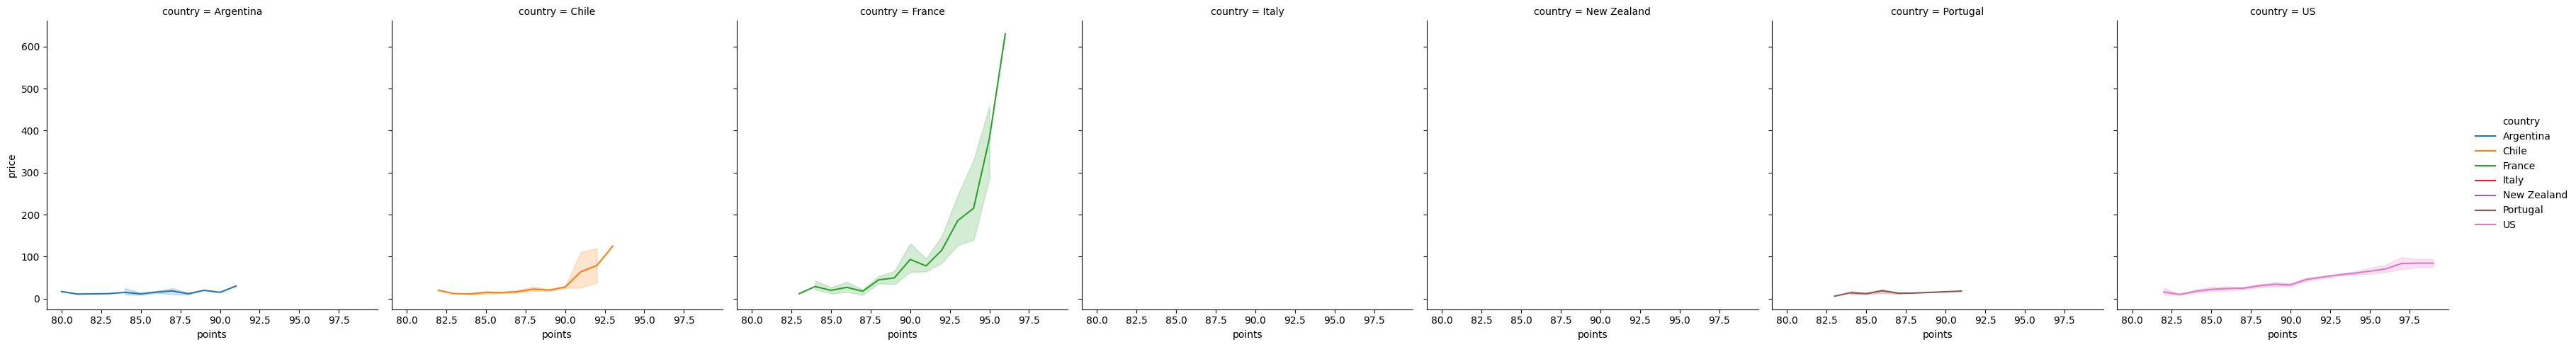

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

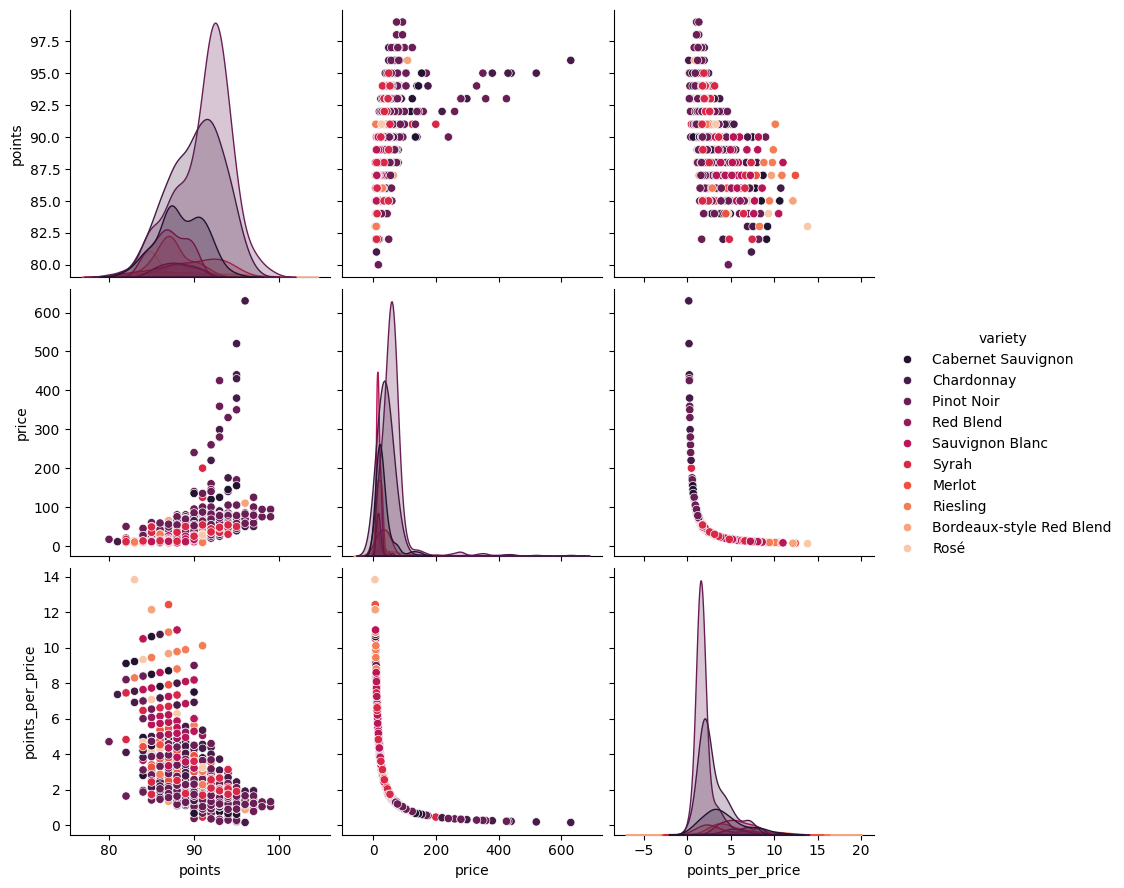

In [ ]:
sns.pairplot(p_v, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

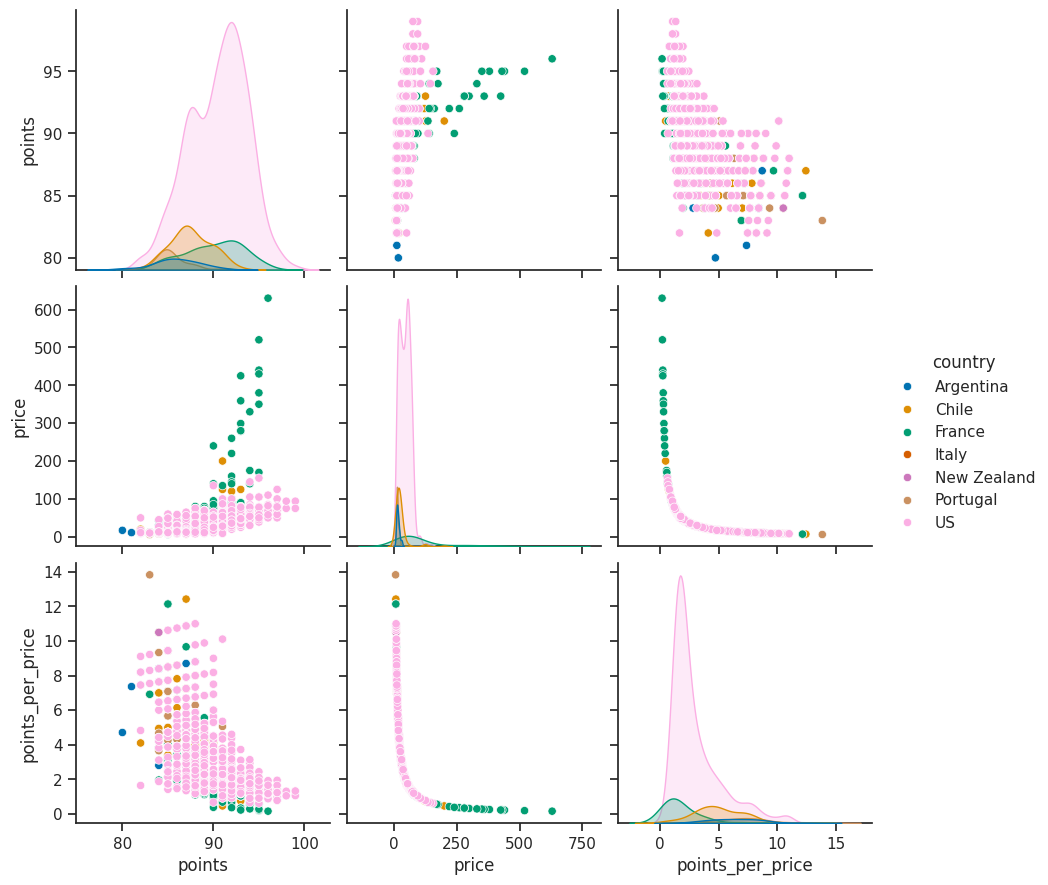

In [ ]:
sns.set(style="ticks")


sns.pairplot(p_v, hue="country", height=3, palette='colorblind')
plt.show()


#### &#9758; Observa las distribuciones por pares en función de la bodega.

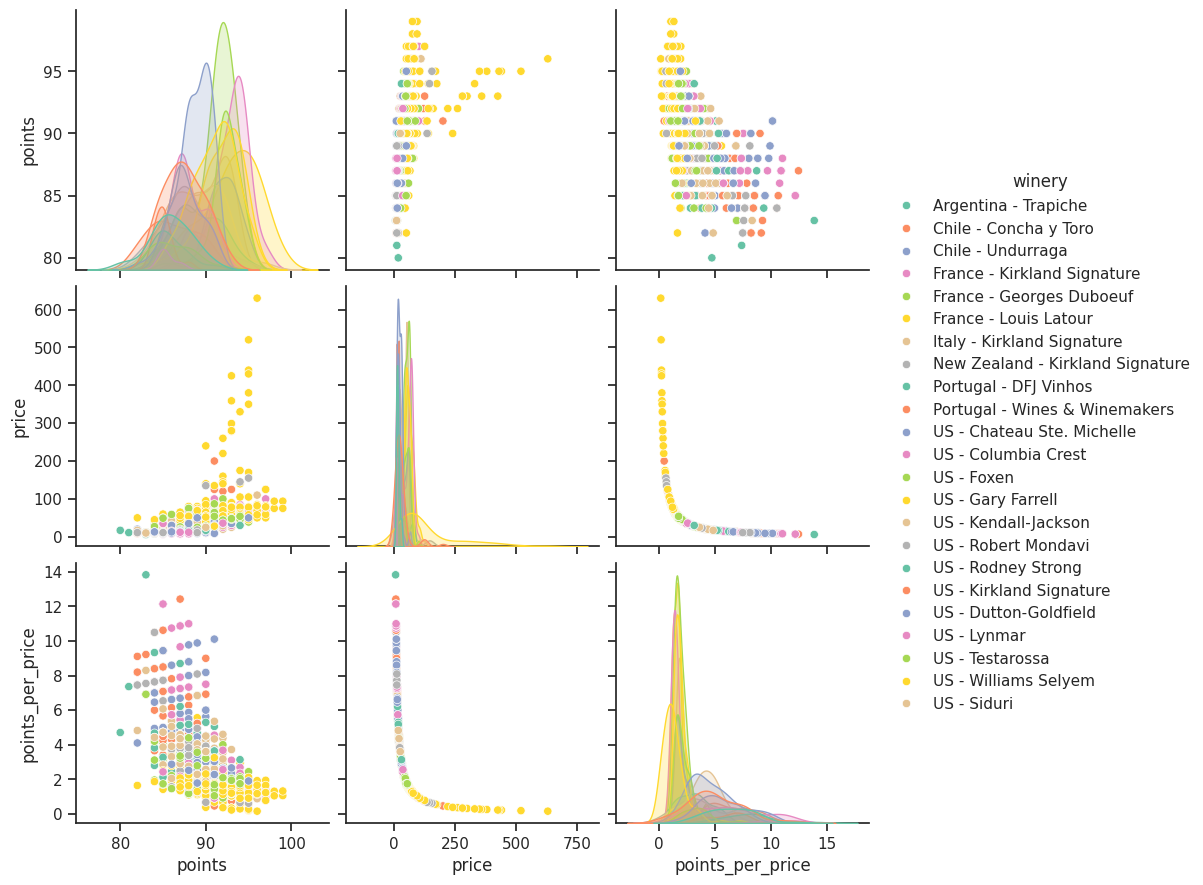

In [ ]:
sns.pairplot(p_v, hue="winery", height=3, palette='Set2')
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

<ipython-input-19-65f98d075bb4>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=p_v, x='variety', y='price', palette='viridis')


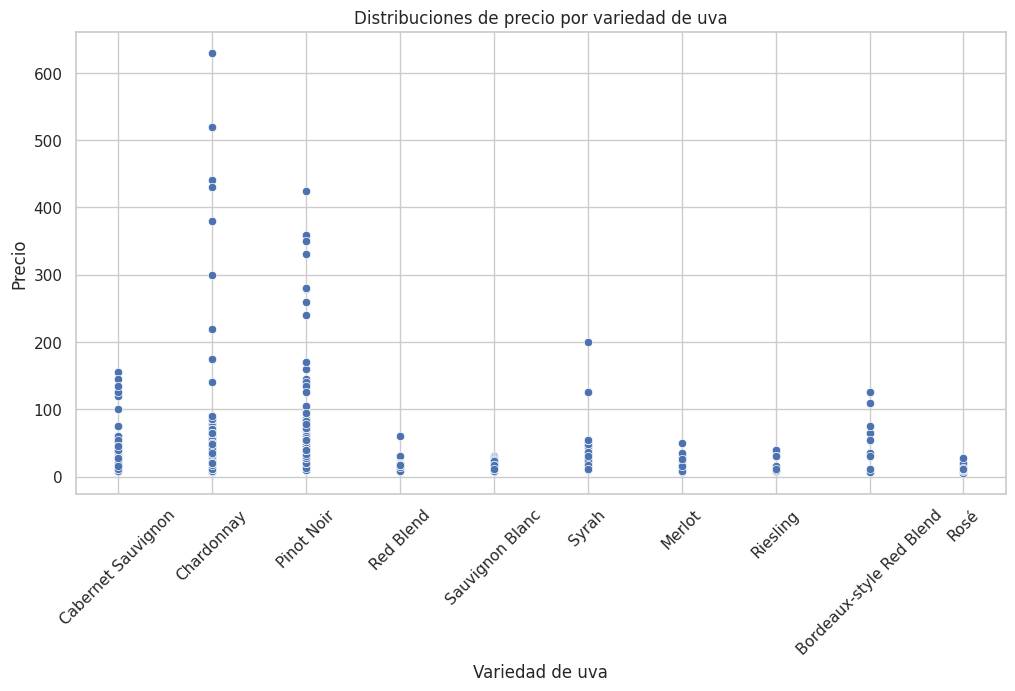

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico de dispersión
sns.scatterplot(data=p_v, x='variety', y='price', palette='viridis')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Variedad de uva')
plt.ylabel('Precio')
plt.title('Distribuciones de precio por variedad de uva')

# Mostrar el gráfico
plt.show()


<ipython-input-20-bf3ca2bf1fa5>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_variedad, x='variety', y='price', palette='viridis', label=variedad)
<ipython-input-20-bf3ca2bf1fa5>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_variedad, x='variety', y='price', palette='viridis', label=variedad)
<ipython-input-20-bf3ca2bf1fa5>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_variedad, x='variety', y='price', palette='viridis', label=variedad)
<ipython-input-20-bf3ca2bf1fa5>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_variedad, x='variety', y='price', palette='viridis', label=variedad)
<ipython-input-20-bf3ca2bf1fa5>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_variedad, x='variet

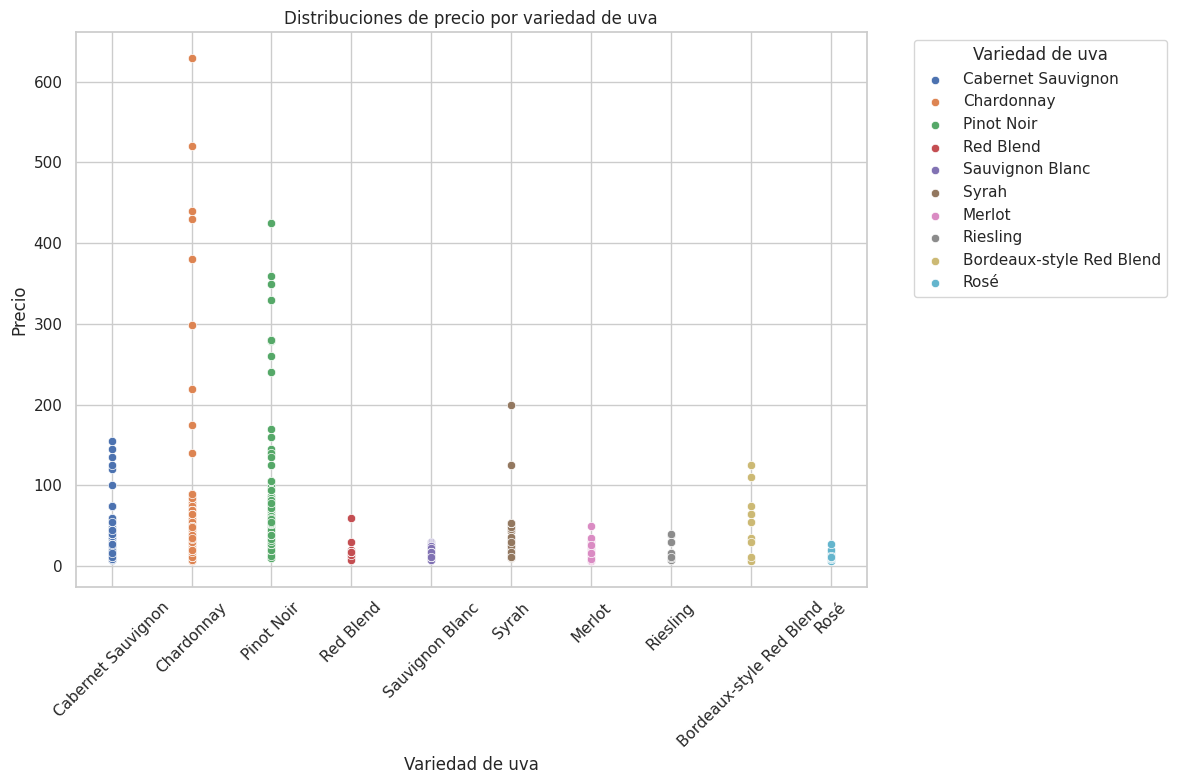

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las variedades de uva únicas
variedades = p_v['variety'].unique()

# Configurar el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Iterar sobre cada variedad de uva y crear un gráfico de dispersión
for variedad in variedades:
    # Filtrar el DataFrame por la variedad de uva actual
    data_variedad = p_v[p_v['variety'] == variedad]

    # Crear el gráfico de dispersión para la variedad de uva actual
    sns.scatterplot(data=data_variedad, x='variety', y='price', palette='viridis', label=variedad)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Variedad de uva')
plt.ylabel('Precio')
plt.title('Distribuciones de precio por variedad de uva')

# Mostrar leyenda
plt.legend(title='Variedad de uva', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

<ipython-input-21-045a02885b3a>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=p_v, x='winery', y='price', palette='viridis')


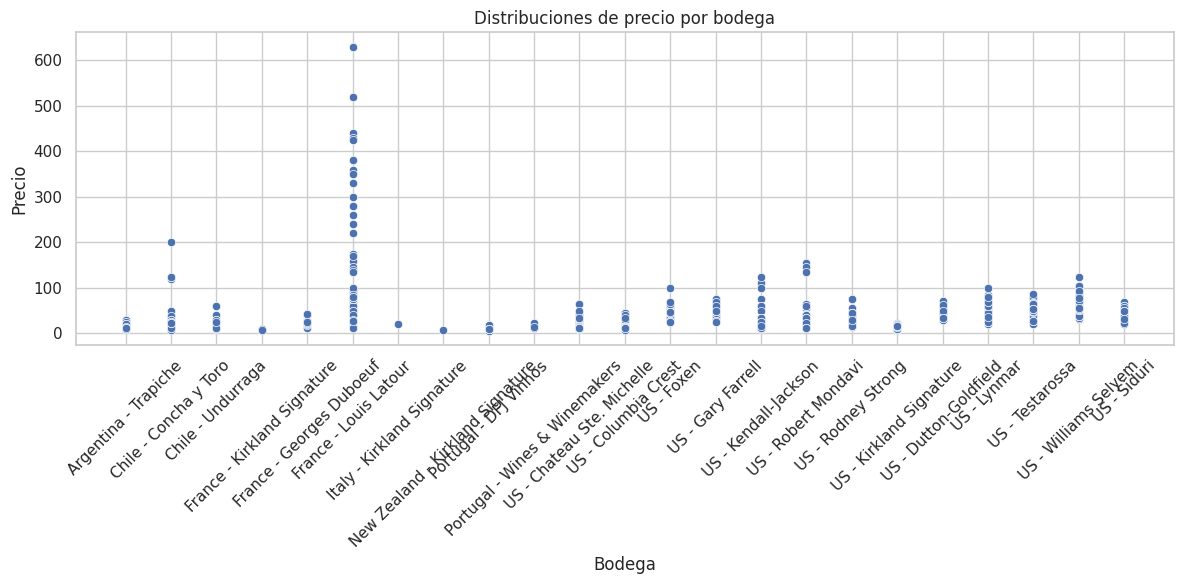

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico de dispersión
sns.scatterplot(data=p_v, x='winery', y='price', palette='viridis')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Bodega')
plt.ylabel('Precio')
plt.title('Distribuciones de precio por bodega')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

<ipython-input-22-045a02885b3a>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=p_v, x='winery', y='price', palette='viridis')


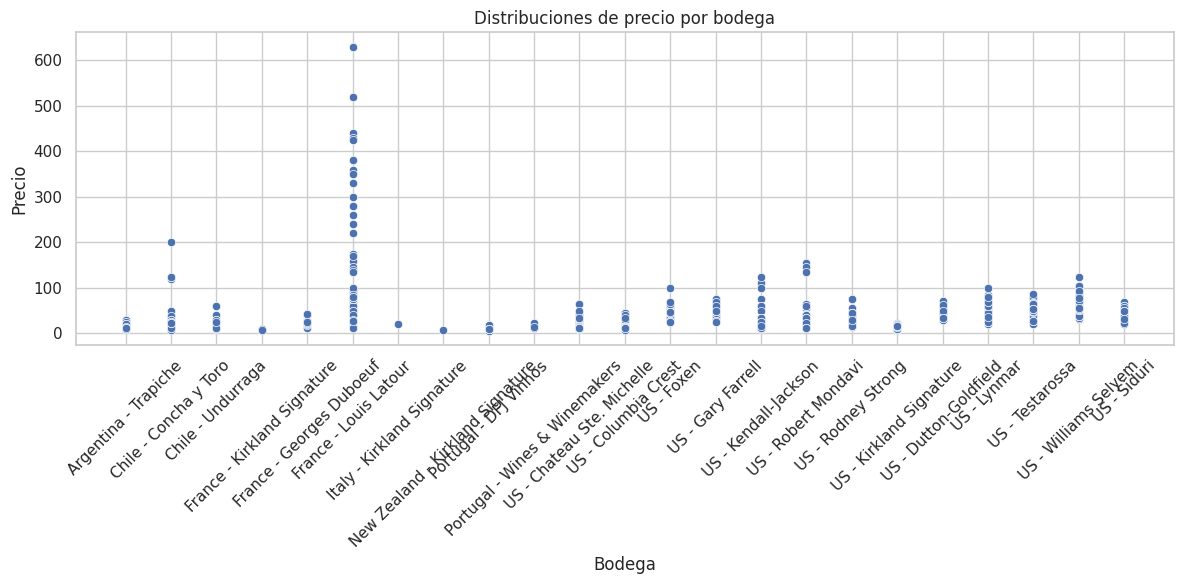

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico de dispersión
sns.scatterplot(data=p_v, x='winery', y='price', palette='viridis')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Bodega')
plt.ylabel('Precio')
plt.title('Distribuciones de precio por bodega')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

<ipython-input-23-12cbd1f924f1>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=p_v, x='country', y='points_per_price', palette='viridis')


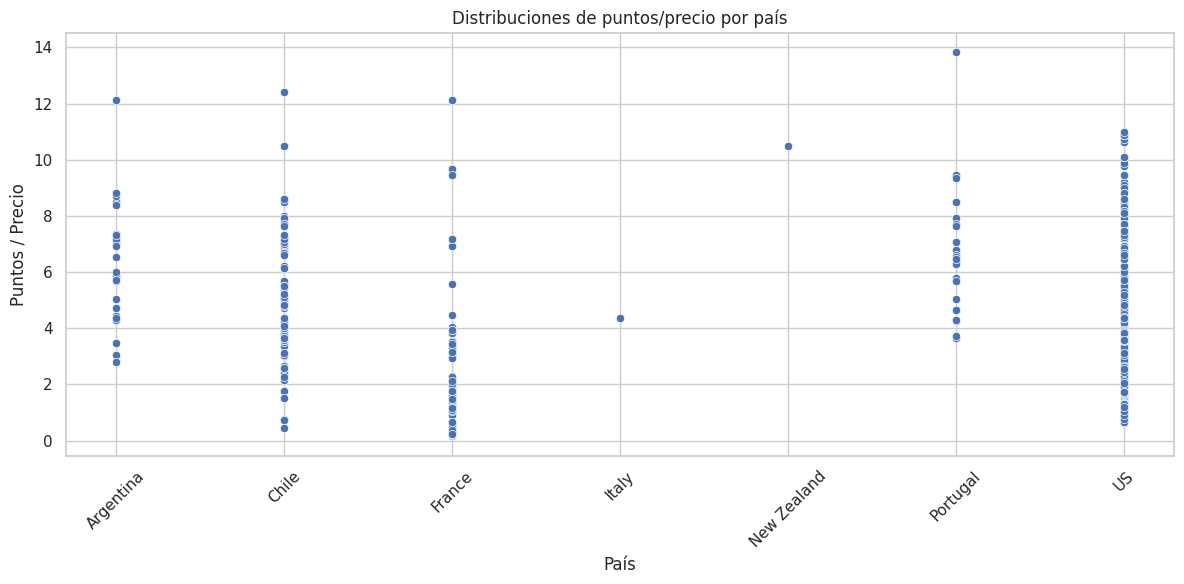

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico de dispersión
sns.scatterplot(data=p_v, x='country', y='points_per_price', palette='viridis')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('País')
plt.ylabel('Puntos / Precio')
plt.title('Distribuciones de puntos/precio por país')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [ ]:

df3 = pd.merge(vinosMX, p_v[['country', 'variety', 'winery', 'points', 'price']],
                       on=['country', 'variety', 'winery', 'points', 'price'], how='outer')


print(df3)

     country           winery             variety  \
0     Mexico       L.A. Cetto            Nebbiolo   
1     Mexico      Monte Xanic     Sauvignon Blanc   
2     Mexico       L.A. Cetto  Cabernet Sauvignon   
3     Mexico      Cava Aragon            Nebbiolo   
4     Mexico       L.A. Cetto        Petite Sirah   
...      ...              ...                 ...   
1025      US  US - Testarossa               Syrah   
1026      US  US - Testarossa               Syrah   
1027      US  US - Testarossa               Syrah   
1028      US  US - Testarossa               Syrah   
1029     NaN              NaN     Sauvignon Blanc   

                                            description  points  price  
0     The color is appropriately light, the aromas a...      88   18.0  
1     Sauvignon Blanc is, in general, one of Baja's ...      87   15.0  
2     Aromas of mature Cabernet: cassis, tobacco lea...      87   18.0  
3     While this is fiery on the nose, you also get ...      88   27.0 

#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [ ]:
vinos_mexico = df3[df3['country'] == 'Mexico']

# Calcular los valores de points/price
vinos_mexico['points/price'] = vinos_mexico.apply(lambda row: row['points'] / row['price'], axis=1)

# Mostrar los resultados
print(vinos_mexico[['points', 'price', 'points/price']])


    points  price  points/price
0       88   18.0      4.888889
1       87   15.0      5.800000
2       87   18.0      4.833333
3       88   27.0      3.259259
4       83    8.0     10.375000
5       83   21.0      3.952381
6       86   39.0      2.205128
7       84   15.0      5.600000
8       83   22.0      3.772727
9       90   56.0      1.607143
10      82   25.0      3.280000
11      82   30.0      2.733333
12      87   19.0      4.578947
13      87   33.0      2.636364
14      84   27.0      3.111111
15      86   13.0      6.615385
16      87   58.0      1.500000
17      83   13.0      6.384615
18      87   49.0      1.775510
19      88   22.0      4.000000
20      85   23.0      3.695652
21      88   20.0      4.400000
22      88   26.0      3.384615
23      83   27.0      3.074074
24      89   31.0      2.870968
25      92   54.0      1.703704
26      84   10.0      8.400000
27      86   22.0      3.909091
28      88   40.0      2.200000
29      86   23.0      3.739130


<ipython-input-28-b49e41271b2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinos_mexico['points/price'] = vinos_mexico.apply(lambda row: row['points'] / row['price'], axis=1)


#### &#9758; Observa la relación puntos-precio por país

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

      country                winery             variety description  points  \
30  Argentina  Argentina - Trapiche  Cabernet Sauvignon         NaN      84   
31  Argentina  Argentina - Trapiche  Cabernet Sauvignon         NaN      88   
32  Argentina  Argentina - Trapiche  Cabernet Sauvignon         NaN      90   
33  Argentina  Argentina - Trapiche  Cabernet Sauvignon         NaN      88   
34  Argentina  Argentina - Trapiche  Cabernet Sauvignon         NaN      91   

    price  
30   10.0  
31   15.0  
32   15.0  
33   10.0  
34   30.0  


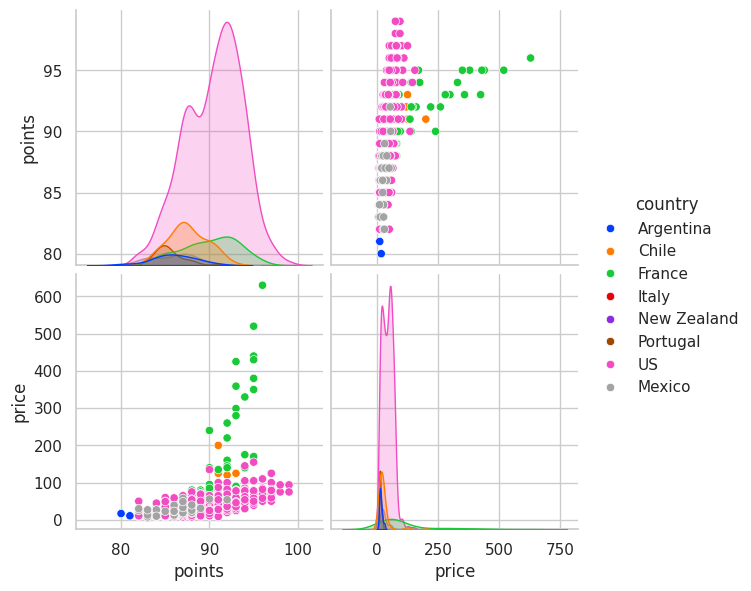

In [ ]:


# Separar los datos de México
mexico_data = df3[df3['country'] == 'Mexico']
otros_data = df3[df3['country'] != 'Mexico']

# Concatenar los dos subconjuntos
mx_top = pd.concat([otros_data, mexico_data])

# Mostrar los primeros elementos de mx_top
print(mx_top.head())


sns.pairplot(mx_top, hue="country",height=3,palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

<ipython-input-30-d31340acea07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'L.A. Cetto'),
  Text(1, 0, 'Monte Xanic'),
  Text(2, 0, 'Cava Aragon'),
  Text(3, 0, 'Hacienda La Lomita'),
  Text(4, 0, 'Tres Valles'),
  Text(5, 0, 'Unión de Productores del Valle (UPVG)'),
  Text(6, 0, 'Vinicola Fraternidad'),
  Text(7, 0, 'Vinos Magbel'),
  Text(8, 0, 'Möebius'),
  Text(9, 0, 'Vinicola Urbana'),
  Text(10, 0, 'Vena Cava'),
  Text(11, 0, 'Viñas de Garza'),
  Text(12, 0, 'Vinisterra'),
  Text(13, 0, 'Cava Maciel'),
  Text(14, 0, 'Rincón de Guadalupe'),
  Text(15, 0, 'La Lomita'),
  Text(16, 0, 'Argentina - Trapiche'),
  Text(17, 0, 'Chile - Concha y Toro'),
  Text(18, 0, 'Chile - Undurraga'),
  Text(19, 0, 'France - Kirkland Signature'),
  Text(20, 0, 'France - Georges Duboeuf'),
  Text(21, 0, 'France - Louis Latour'),
  Text(22, 0,

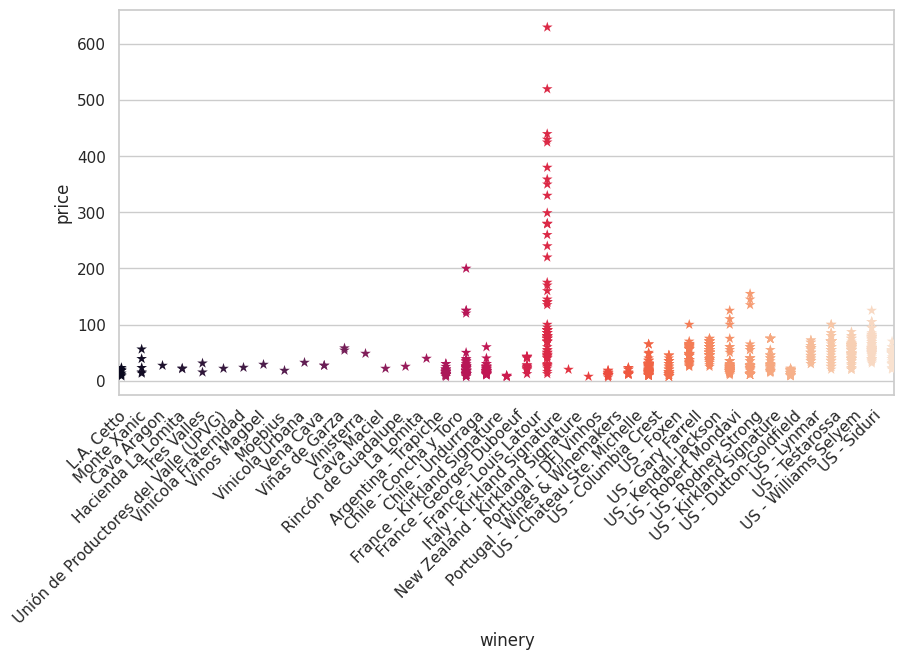

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

<ipython-input-35-88be49929b9c>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=vinos_mexico, x='winery', y='points/price', palette='viridis')


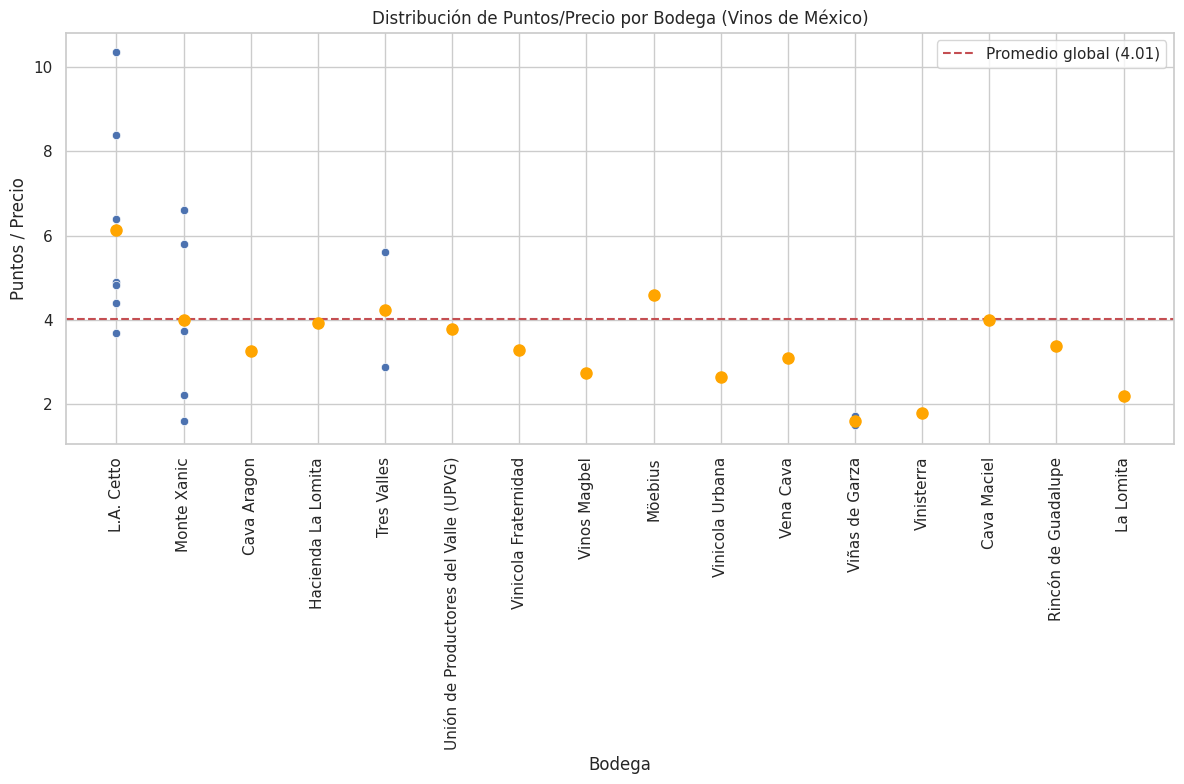

In [ ]:

medias = vinos_mexico.groupby('winery')['points/price'].mean().reset_index()

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión de puntos/precio por bodega
plt.figure(figsize=(12, 8))
sns.scatterplot(data=vinos_mexico, x='winery', y='points/price', palette='viridis')

# Dibujar una línea horizontal que marque el promedio de todos los datos
promedio_global = vinos_mexico['points/price'].mean()
plt.axhline(y=promedio_global, color='r', linestyle='--', label=f'Promedio global ({promedio_global:.2f})')

# Añadir marcas para los valores promedio de puntos/precio por cada bodega
for index, row in medias.iterrows():
    plt.plot(row['winery'], row['points/price'], marker='o', color='orange', markersize=8)

# Configurar etiquetas y título
plt.xlabel('Bodega')
plt.ylabel('Puntos / Precio')
plt.title('Distribución de Puntos/Precio por Bodega (Vinos de México)')
plt.xticks(rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()




#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

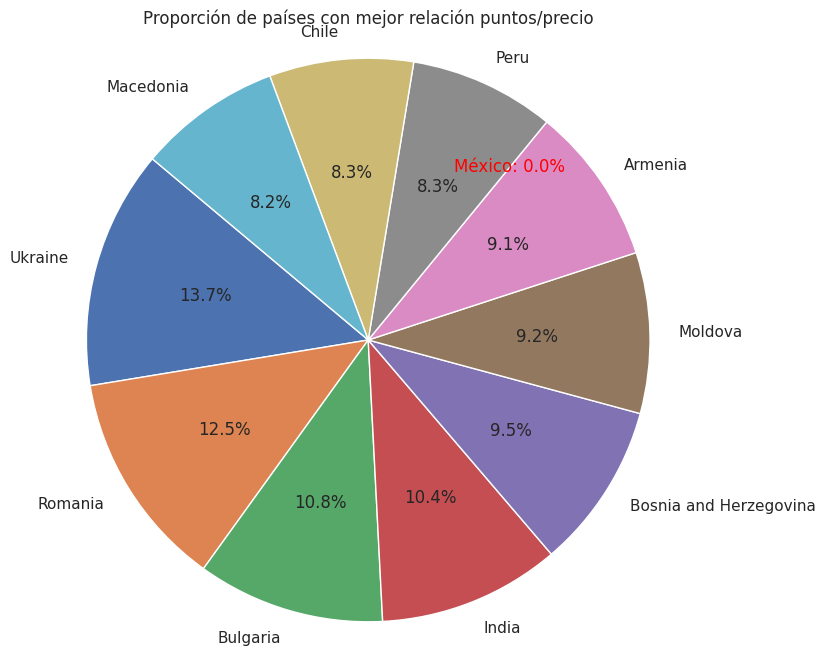

In [ ]:
import matplotlib.pyplot as plt

# Calcular la columna points/price
df['points/price'] = df['points'] / df['price']

# Calcular la relación puntos/precio promedio por país para todos los vinos en el DataFrame df
relacion_promedio_por_pais = df.groupby('country')['points/price'].mean().sort_values(ascending=False)

# Seleccionar los 10 países con la mejor relación puntos/precio
mejores_paises = relacion_promedio_por_pais.head(10)

# Obtener la proporción de México en relación con los mejores países
proporcion_mexico = mejores_paises.get('Mexico', 0) / mejores_paises.sum()

# Graficar la proporción de los países con mejor relación puntos/precio en un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(mejores_paises, labels=mejores_paises.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de países con mejor relación puntos/precio')
plt.annotate(f'México: {proporcion_mexico:.1%}', xy=(0.5, 0.5), xytext=(0.5, 0.6), fontsize=12, ha='center', color='red')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
